In [2]:
import csv

dataset = []
labels = []
with open("mnist.csv") as f:
    for cols in csv.reader(f):
        labels.append(int(cols.pop(0)))
        dataset.append(list(map(int, cols)))

In [5]:
def get_char(pixel):
    ranges = {
        (0, 64): " ",
        (64, 128): ".",
        (128, 192): "*",
        (192, 256): "#"
    }
    for (a,b),ch in ranges.items():
        if a <= pixel < b:
            return ch

[ get_char(0), get_char(72), get_char(192), get_char(138), get_char(250) ]

[' ', '.', '#', '*', '#']

In [8]:
def print_digit(dataset, digit):
    chars = list(map(get_char, dataset[digit]))
    for i in range(28): # iterate over rows
        for j in range(28): # iterate over columns
            print(chars[i*28+j], end="")
        print()
   

In [11]:
print_digit(dataset, 129)
def get_char(pixel_value):
    # Map pixel value to a character based on intensity
    if pixel_value > 128:
        return "#"
    else:
        return "."


............................
............................
............................
............................
............................
...............#......##....
..............##..######....
............##########......
...........########.........
..........###...............
.........###................
.........##.................
.........##.................
.........####...............
..........#####.............
............#####...........
..............#####.........
................###.........
.................##.........
................###.........
...............###..........
.............####...........
........#..#####............
........######..............
........####................
............................
............................
............................


In [14]:
def euclidean_distance(x, y):
    return sum([ (x_i - y_i) ** 2 for x_i, y_i in zip(x, y) ]) ** 0.5

( euclidean_distance([0,0], [1,1]), euclidean_distance([1,1], [1,1]), euclidean_distance([0,0], [0,1]) )

(1.4142135623730951, 0.0, 1.0)

In [15]:
positions = [ 25, 29, 31, 34 ]
for i in range(len(positions)):
    for j in range(i+1, len(positions)):
        a = positions[i]
        b = positions[j]
        print(a, b, euclidean_distance(dataset[a], dataset[b]))

25 29 3539.223219860539
25 31 3556.4199695761467
25 34 3223.2069434027967
29 31 1171.8293391104355
29 34 2531.0033583541526
31 34 2515.5599774205343


In [18]:
[ labels[i] for i in (25, 29, 31, 34) ]

[0, 1, 1, 7]

406


<Axes: title={'center': 'diff'}>

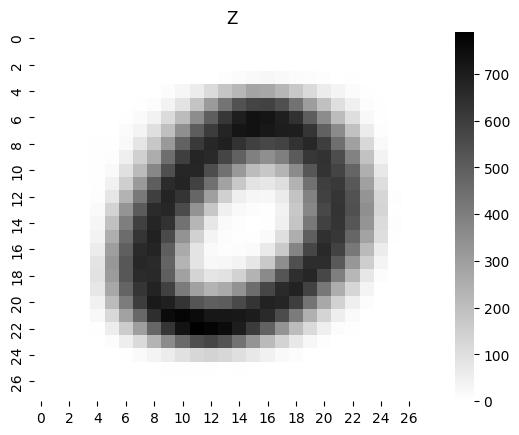

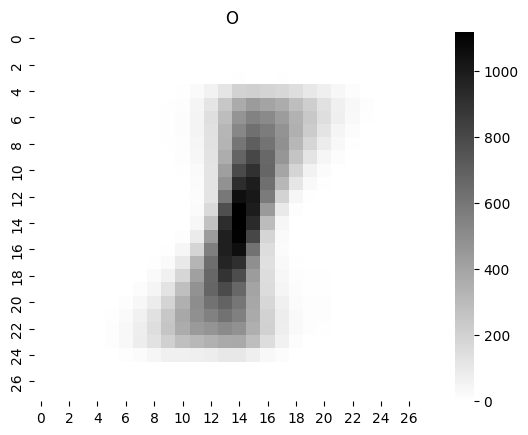

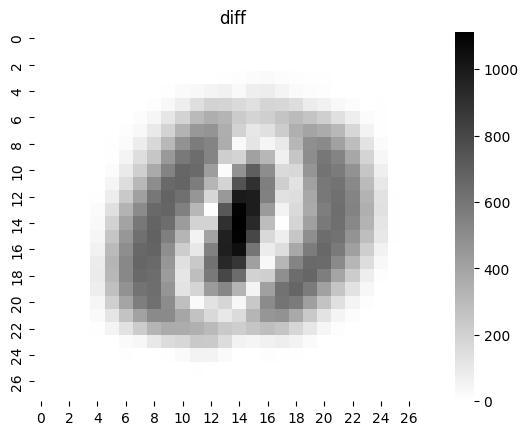

In [24]:
def count_black_pixels(dataset, labels, digit):
    X = [0] * 784 # this is a fast way of initializing a 784-dimensional list with all 0's
    for values, label in zip(dataset, labels):
        if label != digit:
            continue
        for i, pixel in enumerate(values):
            if pixel >= 128: # use 128 as the threshold value
                X[i] += 1
    return X
Z = count_black_pixels(dataset, labels, 0)
O = count_black_pixels(dataset, labels, 1)
diff = [ abs(z-o) for z,o in zip(Z, O) ]
def argmax(w):
    return max(enumerate(w), key=lambda x: x[1])[0]
print(argmax(diff))
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.title("Z")
sns.heatmap(np.reshape(Z, (28, 28)), cmap='binary')
plt.figure()
plt.title("O")
sns.heatmap(np.reshape(O, (28, 28)), cmap='binary')
plt.figure()
plt.title("diff")
sns.heatmap(np.reshape(diff, (28, 28)), cmap='binary')

In [26]:
(labels.count(0), labels.count(1))

(980, 1135)

In [27]:
Z_count = labels.count(0)
O_count = labels.count(1)
diff_norm = [ abs(z / Z_count - o / O_count) for z,o in zip (Z,O) ]
argmax(diff_norm)

406